In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv('datack1.csv')
df_no_encoded = pd.read_csv('data_no_encoded.csv')

# K means

### cùi trỏ

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-package

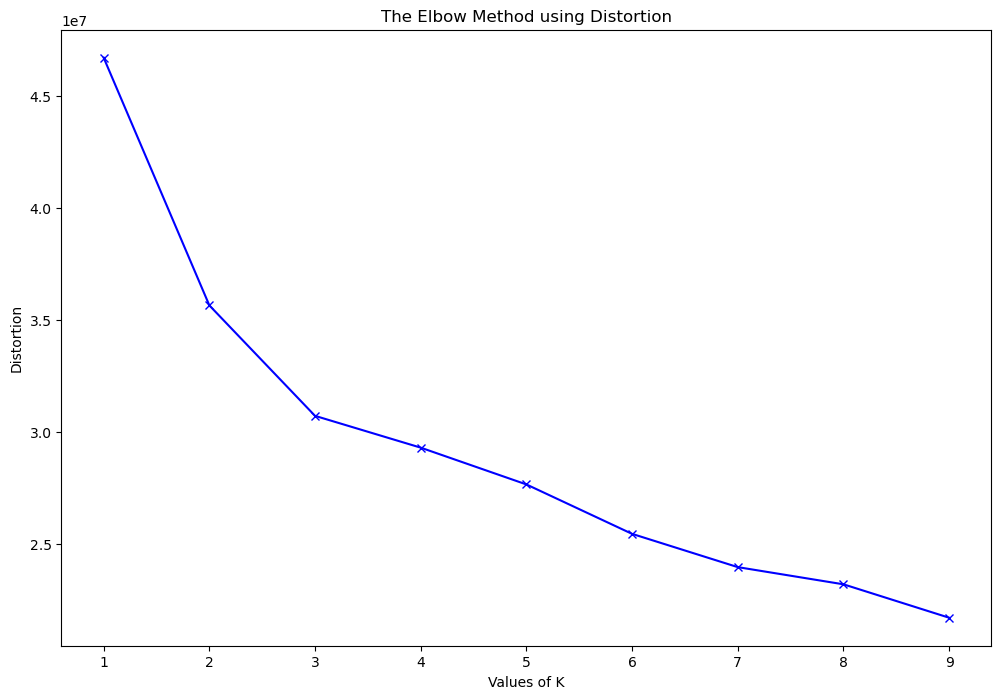

In [4]:
selected_columns = ['Năm sản xuất', 'Tình trạng', 'Kiểu dáng', 'Số Km đã đi', 'Xuất xứ', 'Hãng xe', 'Dẫn động', 'Số chỗ ngồi', 'Địa điểm', 'Động cơ', 'Hộp số', 'Giá']
X = df[selected_columns]

losses = []
K = 10
for i in range(1, K):
  # 1.  Huấn luyện với số cụm = i
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(df)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
  d2centroids = cdist(df, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
  min_distance = np.min(d2centroids, axis=1) # shape (n)
  loss = np.sum(min_distance)
  losses.append(loss)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Thêm cột 'Cluster' vào dataframe để lưu kết quả phân cụm
df_no_encoded['Cluster'] = kmeans.labels_


df_no_encoded.to_csv('data_clustered.csv', index=False)

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


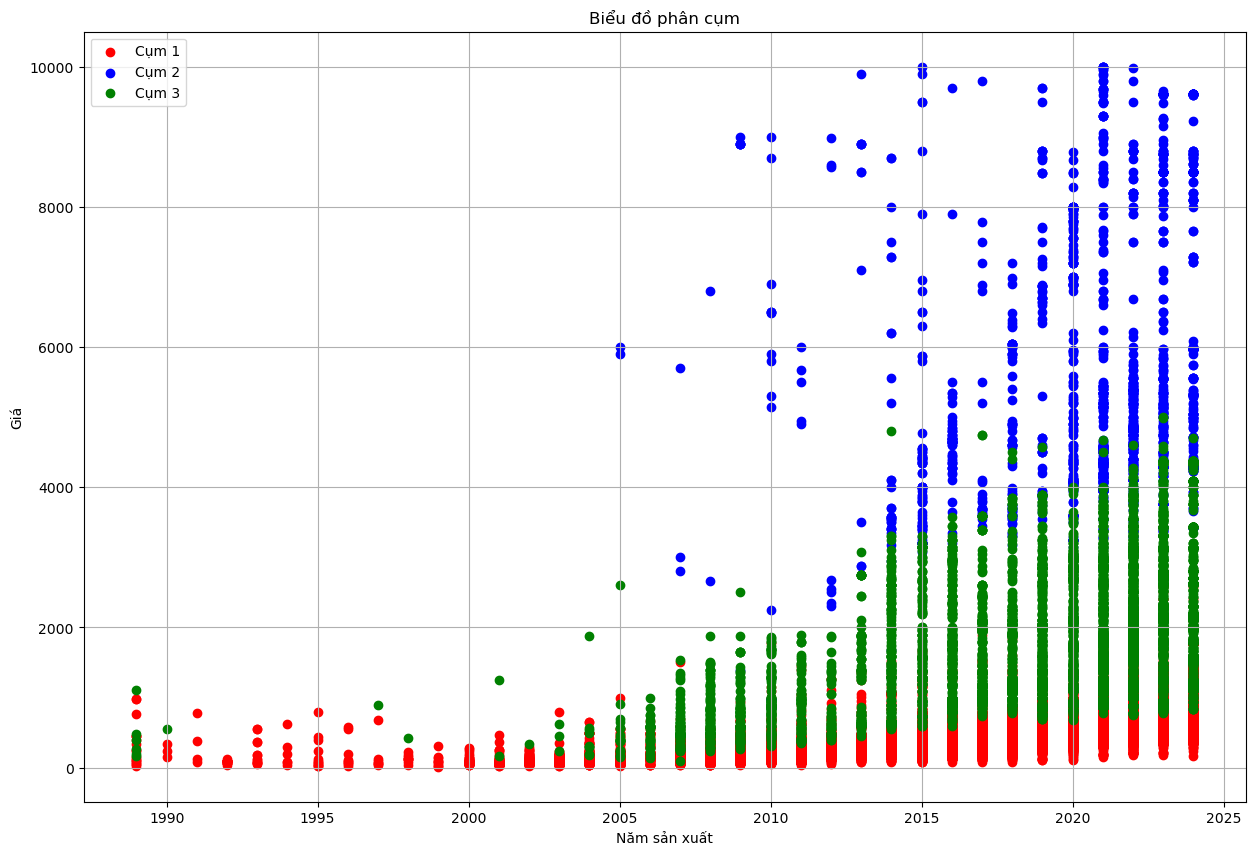

In [6]:
data_clustered = pd.read_csv('data_clustered.csv')

# Phân tách dữ liệu theo từng cụm
cluster1 = data_clustered[data_clustered['Cluster'] == 0]
cluster2 = data_clustered[data_clustered['Cluster'] == 1]
cluster3 = data_clustered[data_clustered['Cluster'] == 2]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(15, 10))

# Phân tách từng cụm và vẽ lên biểu đồ
plt.scatter(cluster1['Năm sản xuất'], cluster1['Giá'], color='red', label='Cụm 1')
plt.scatter(cluster2['Năm sản xuất'], cluster2['Giá'], color='blue', label='Cụm 2')
plt.scatter(cluster3['Năm sản xuất'], cluster3['Giá'], color='green', label='Cụm 3')

# Đặt tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân cụm')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

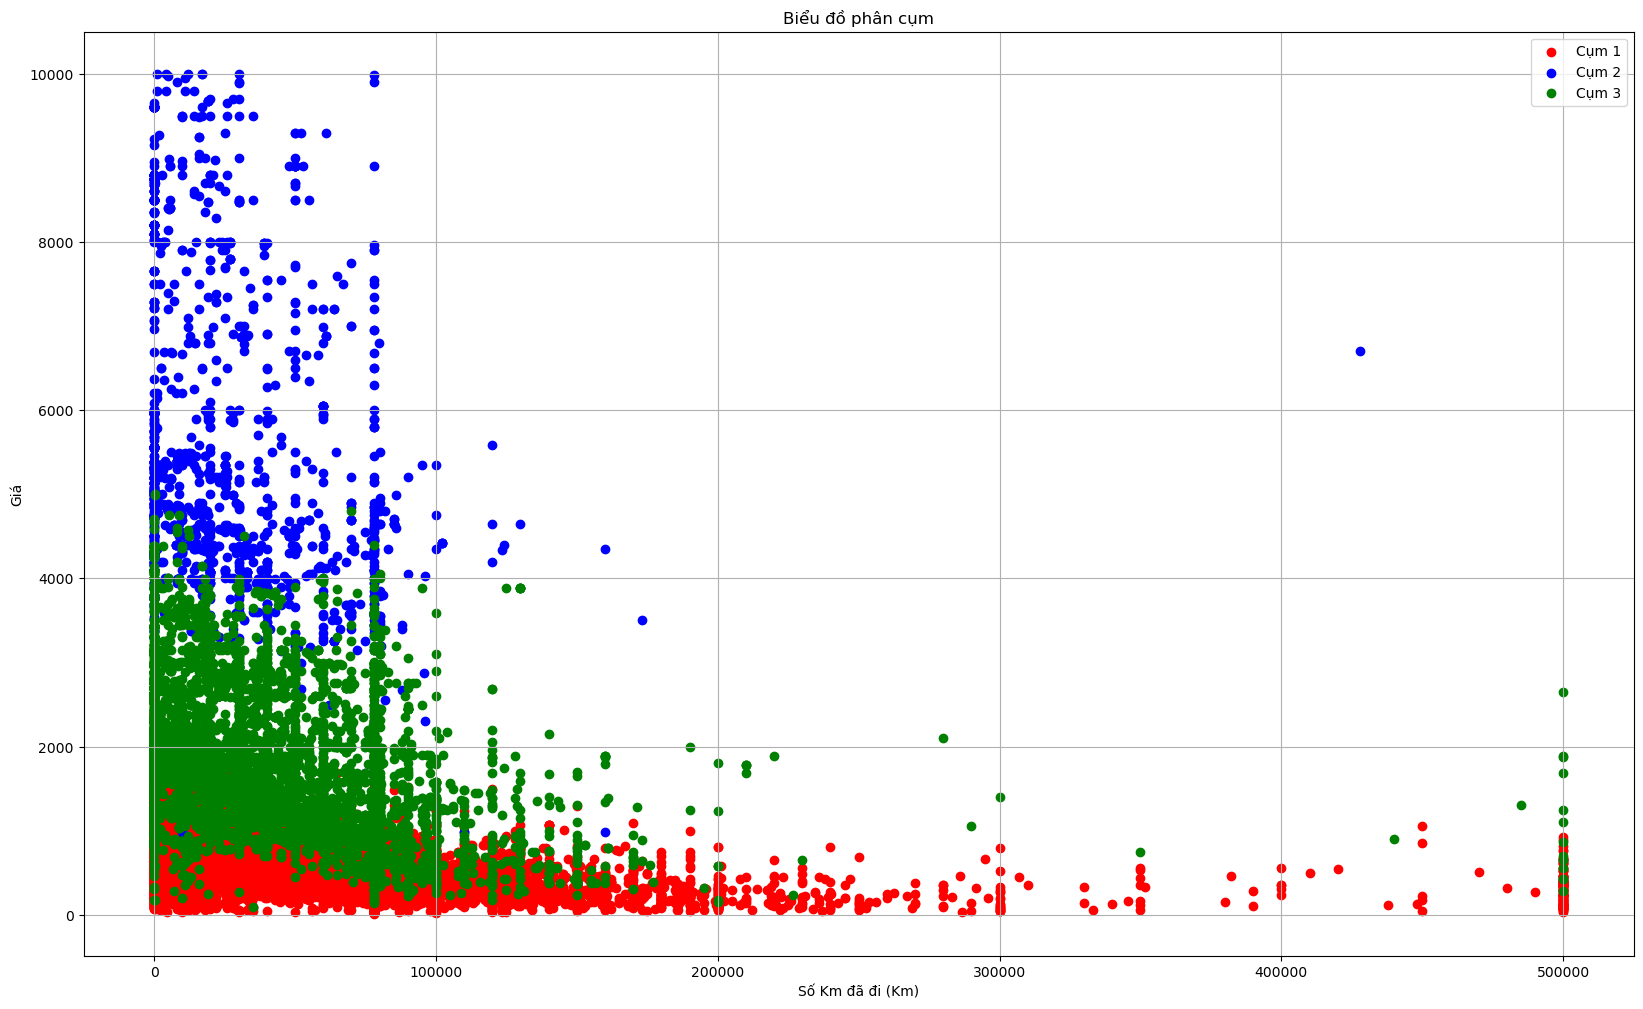

In [7]:
# Phân tách dữ liệu theo từng cụm
cluster1 = data_clustered[data_clustered['Cluster'] == 0]
cluster2 = data_clustered[data_clustered['Cluster'] == 1]
cluster3 = data_clustered[data_clustered['Cluster'] == 2]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(20, 12))

# Phân tách từng cụm và vẽ lên biểu đồ
plt.scatter(cluster1['Số Km đã đi'], cluster1['Giá'], color='red', label='Cụm 1')
plt.scatter(cluster2['Số Km đã đi'], cluster2['Giá'], color='blue', label='Cụm 2')
plt.scatter(cluster3['Số Km đã đi'], cluster3['Giá'], color='green', label='Cụm 3')

# Đặt tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân cụm')
plt.xlabel('Số Km đã đi (Km)')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [8]:
def get_popular_brands(number_of_brands):
  hang_xe_counts = data_clustered['Hãng xe'].value_counts()
  return hang_xe_counts.head(number_of_brands).index.to_list()


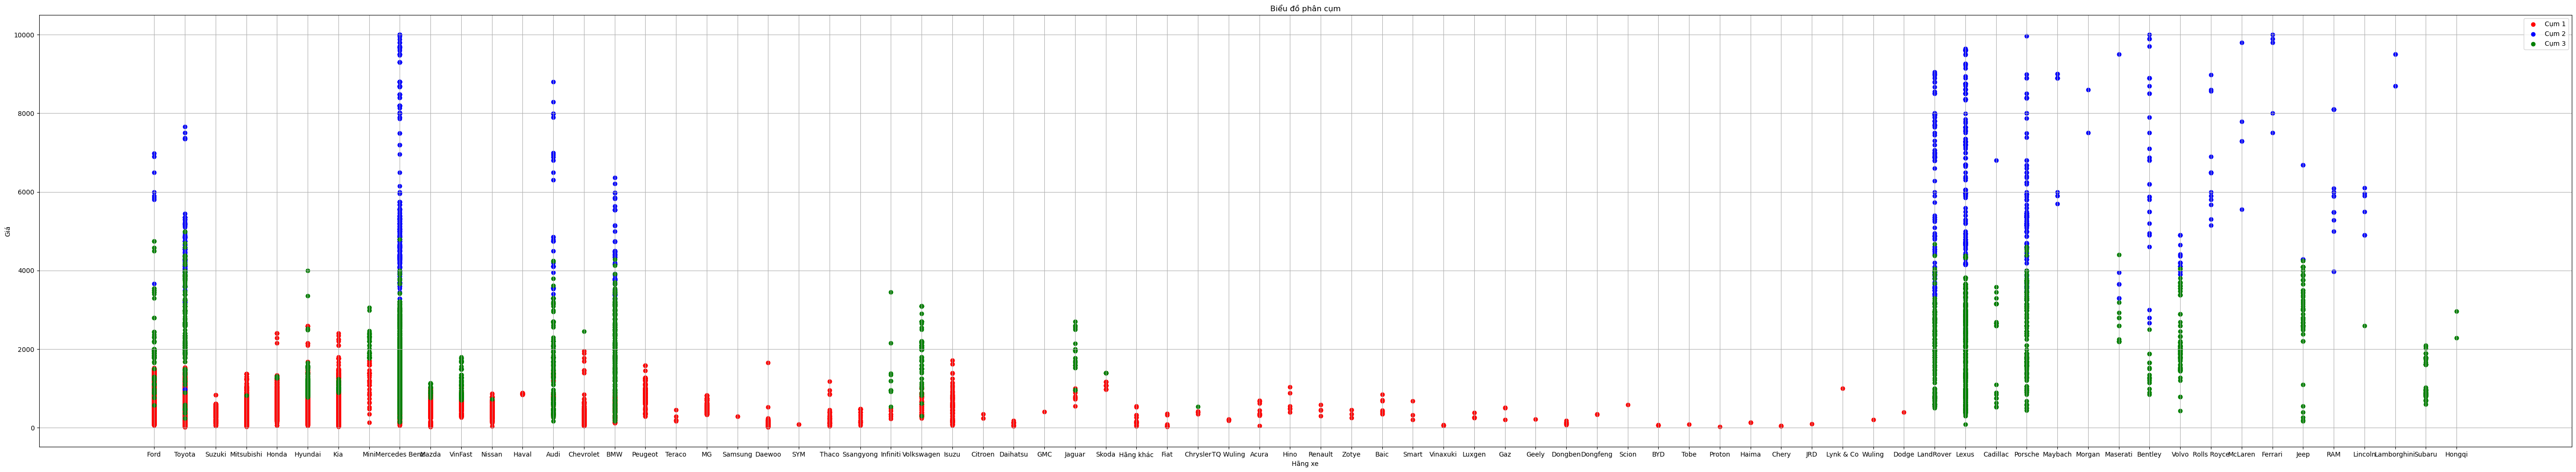

In [9]:
# Phân tách dữ liệu theo từng cụm
cluster1 = data_clustered[data_clustered['Cluster'] == 0]
cluster2 = data_clustered[data_clustered['Cluster'] == 1]
cluster3 = data_clustered[data_clustered['Cluster'] == 2]


# Tạo biểu đồ scatter plot
plt.figure(figsize=(70, 12))

# Phân tách từng cụm và vẽ lên biểu đồ
plt.scatter(cluster1['Hãng xe'], cluster1['Giá'], color='red', label='Cụm 1')
plt.scatter(cluster2['Hãng xe'], cluster2['Giá'], color='blue', label='Cụm 2')
plt.scatter(cluster3['Hãng xe'], cluster3['Giá'], color='green', label='Cụm 3')

# Đặt tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân cụm')
plt.xlabel('Hãng xe')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

# Db scan (lỏ)

In [55]:


selected_columns = ['Năm sản xuất', 'Tình trạng', 'Kiểu dáng', 'Số Km đã đi', 'Xuất xứ', 'Hãng xe', 'Dẫn động', 'Số chỗ ngồi', 'Địa điểm', 'Động cơ', 'Hộp số', 'Giá']
X = df[selected_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=2.5, min_samples=290)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

df.to_csv('dbscan_clustered.csv', index=False)

unique_clusters = set(clusters)



### scatter plot dbscan

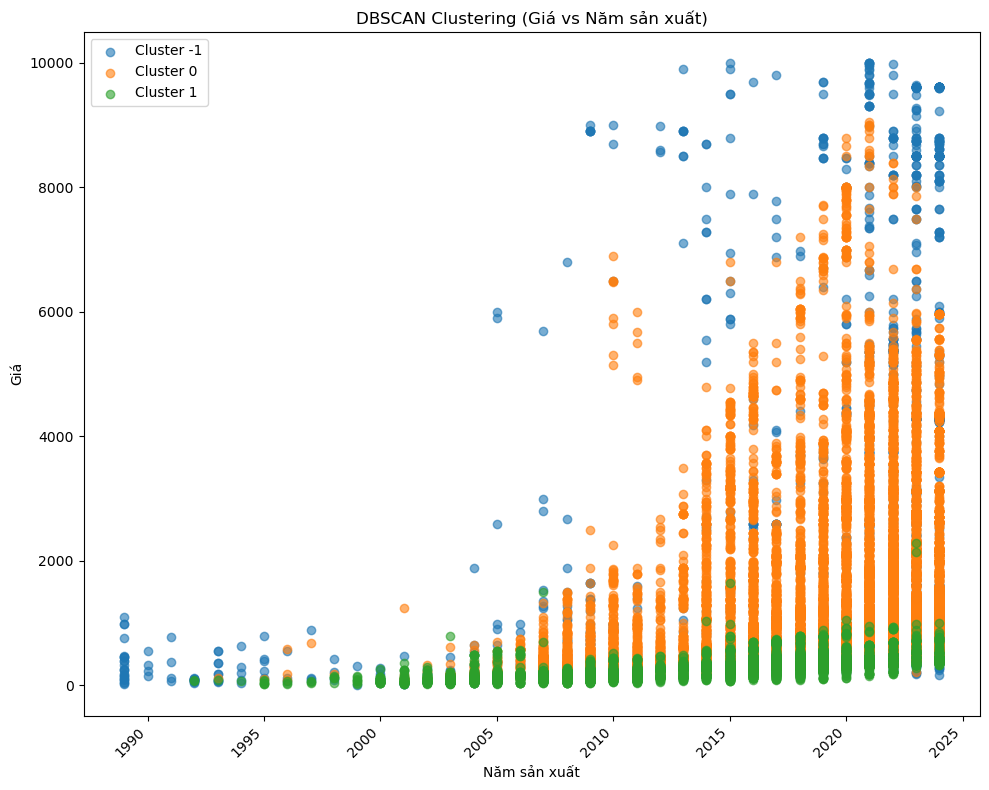

In [56]:

plt.figure(figsize=(10, 8))

# Plot các điểm thuộc cluster -1 trước
cluster_minus_1 = df[df['Cluster'] == -1]
plt.scatter(cluster_minus_1['Năm sản xuất'], cluster_minus_1['Giá'], label='Cluster -1', alpha=0.6)

# Plot các điểm thuộc các cluster khác
for cluster in unique_clusters:
    if cluster != -1:
        subset = df[df['Cluster'] == cluster]
        plt.scatter(subset['Năm sản xuất'], subset['Giá'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('DBSCAN Clustering (Giá vs Năm sản xuất)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá')
plt.legend()
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

#### line plot dbscan

C:\Users\TechCare\AppData\Local\Temp\ipykernel_16908\4190339849.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Năm sản xuất', y='Giá', hue='Cluster', data=mean_prices, palette=['red', 'blue', 'green'], ci=None)
c:\Users\TechCare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TechCare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


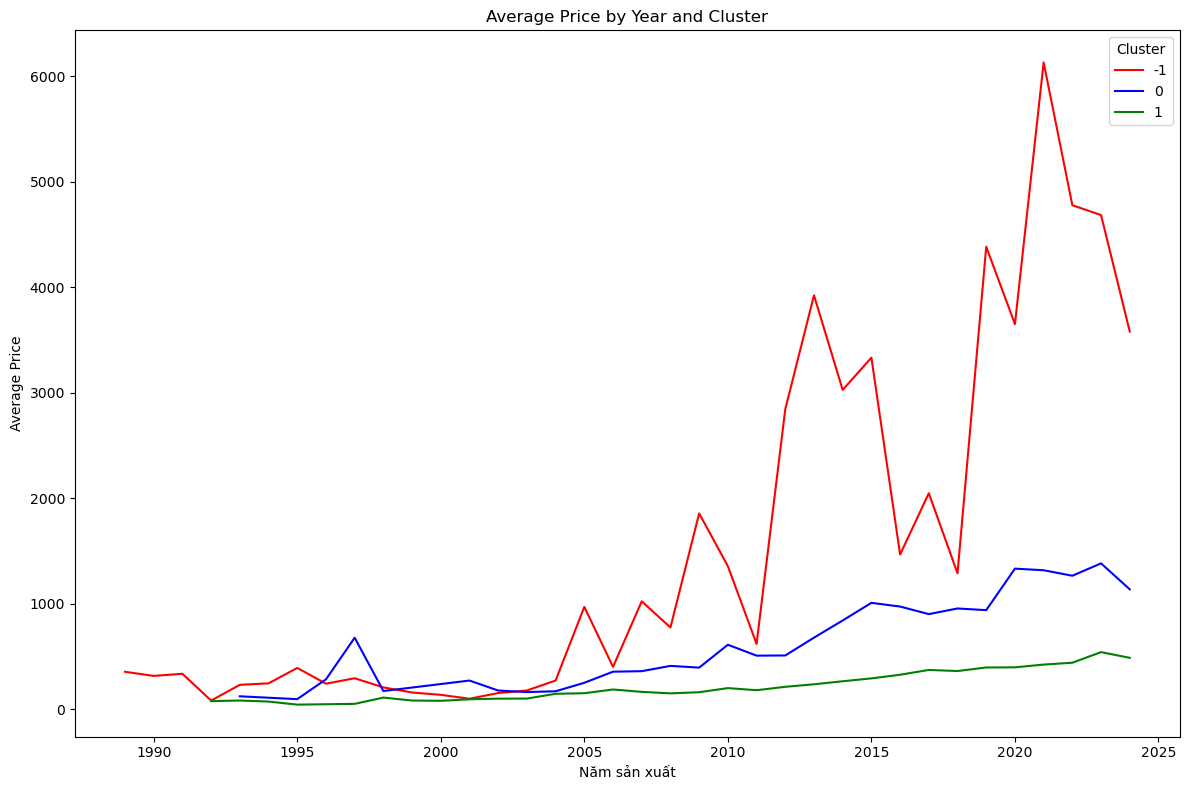

In [54]:

# Tính toán giá trị trung bình của Giá cho mỗi năm và mỗi cụm
mean_prices = df.groupby(['Năm sản xuất', 'Cluster'])['Giá'].mean().reset_index()

# Khởi tạo figure
plt.figure(figsize=(12, 8))

# Tạo biểu đồ line plot cho giá trị trung bình của Giá cho mỗi cụm và tô màu phần dưới
sns.lineplot(x='Năm sản xuất', y='Giá', hue='Cluster', data=mean_prices, palette=['red', 'blue', 'green'], ci=None)

# Đặt tiêu đề và nhãn cho trục
plt.title('Average Price by Year and Cluster')
plt.xlabel('Năm sản xuất')
plt.ylabel('Average Price')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# GMM

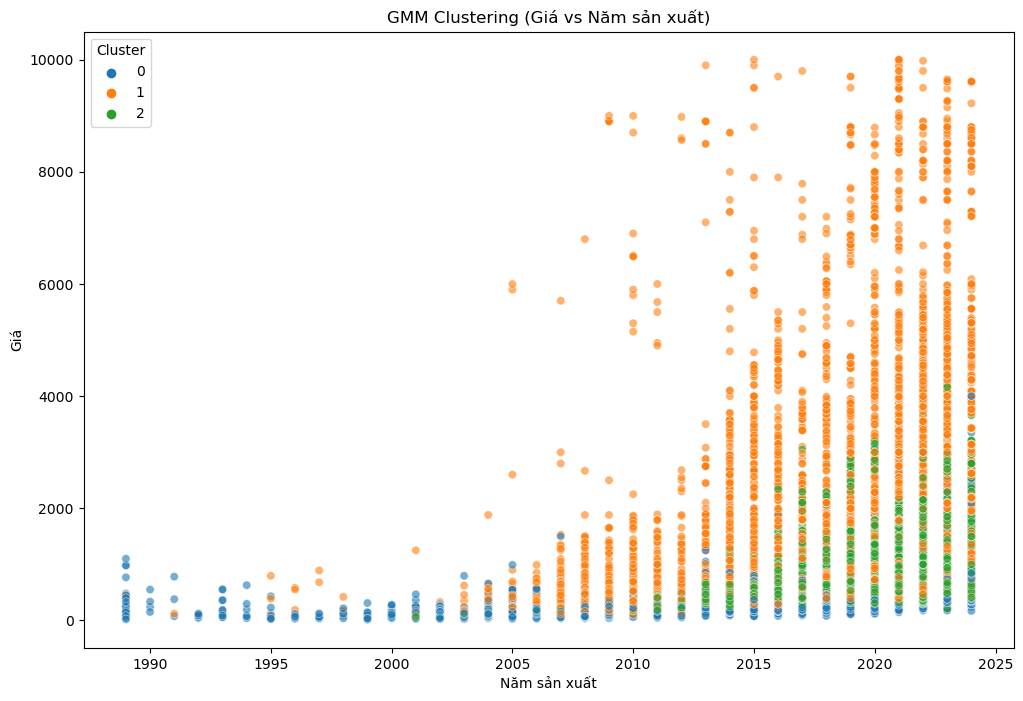

In [82]:
selected_columns = ['Năm sản xuất', 'Tình trạng', 'Kiểu dáng', 'Số Km đã đi', 'Xuất xứ', 'Hãng xe', 'Dẫn động', 'Số chỗ ngồi', 'Địa điểm', 'Động cơ', 'Hộp số', 'Giá']
X = df[selected_columns]

gmm = GaussianMixture(n_components=3,random_state=42)
clusters = gmm.fit_predict(X)

df_no_encoded['Cluster'] = clusters
df_no_encoded.to_csv('gmm_clustered.csv', index=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_no_encoded, x='Năm sản xuất', y='Giá', hue='Cluster', palette='tab10', alpha=0.6)
plt.title('GMM Clustering (Giá vs Năm sản xuất)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá')
plt.legend(title='Cluster')
plt.show()